In [134]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{physics}"
from itertools import product

In [23]:
N = 8
K = 0.5

In [24]:
def E(configuration): # Energy of a configuration / K
    result = 0
    for i in range(N):
        result += configuration[i] * configuration[i + 1]
    return -result

def boltzmann_weight(configuration, K):
    return np.exp(-K * E(configuration))

def two_point(configuration, i, j):
    return configuration[i] * configuration[j]

def observable(configuration):
    return np.array([[two_point(configuration, i, j) for j in range(N + 1)] for i in range(N + 1)])

In [25]:
Z = 0
mean = np.zeros((N + 1, N + 1))

for config in product([-1,0, 1], repeat=N - 1):
    config = (1,) + config + (-1,)
    Z += boltzmann_weight(config, K)
    mean += observable(config) * boltzmann_weight(config, K)

mean /= Z

print(mean)

[[ 1.00000000e+00  3.27911886e-01  1.06526186e-01  3.15672086e-02
   9.79575133e-18 -3.15672086e-02 -1.06526186e-01 -3.27911886e-01
  -1.00000000e+00]
 [ 3.27911886e-01  7.10292673e-01  2.32811367e-01  7.53080987e-02
   2.13194349e-02 -3.36392311e-03 -3.26707736e-02 -1.06879500e-01
  -3.27911886e-01]
 [ 1.06526186e-01  2.32811367e-01  7.02956307e-01  2.30403102e-01
   7.45175643e-02  2.10600930e-02 -3.44695314e-03 -3.26707736e-02
  -1.06526186e-01]
 [ 3.15672086e-02  7.53080987e-02  2.30403102e-01  7.02770528e-01
   2.30342156e-01  7.44980519e-02  2.10600930e-02 -3.36392311e-03
  -3.15672086e-02]
 [ 9.79575133e-18  2.13194349e-02  7.45175643e-02  2.30342156e-01
   7.02765943e-01  2.30342156e-01  7.45175643e-02  2.13194349e-02
  -9.79575133e-18]
 [-3.15672086e-02 -3.36392311e-03  2.10600930e-02  7.44980519e-02
   2.30342156e-01  7.02770528e-01  2.30403102e-01  7.53080987e-02
   3.15672086e-02]
 [-1.06526186e-01 -3.26707736e-02 -3.44695314e-03  2.10600930e-02
   7.45175643e-02  2.3040310

Text(0, 0.5, '$\\ev{s_0 s_i}$')

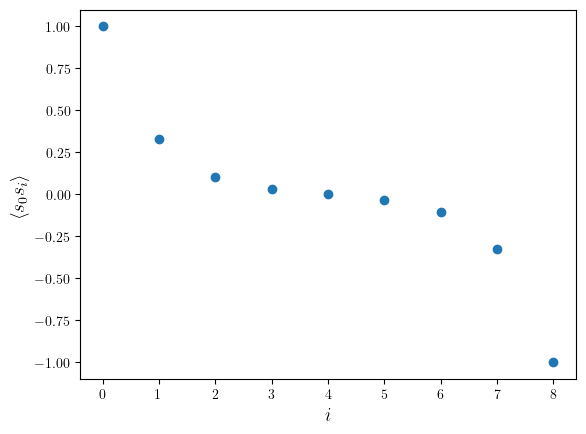

In [26]:
particles = list(range(N + 1))
correlations = mean[0]

fig, ax = plt.subplots()
ax.scatter(particles, correlations)
ax.set_xlabel(r"$i$", fontsize=14)
ax.set_ylabel(r"$\ev{s_0 s_i}$", fontsize=14)

In [27]:
def classical_partition_function(N, K):
    lambda_plus = 2 * np.cosh(K)
    lambda_minus = 2 * np.sinh(K)
    return lambda_plus**N + lambda_minus**N

In [36]:
K_vals = np.linspace(0.1, 0.5, 8)
Z_classical = []

for K in K_vals:
    Z_classical.append(classical_partition_function(N, K))


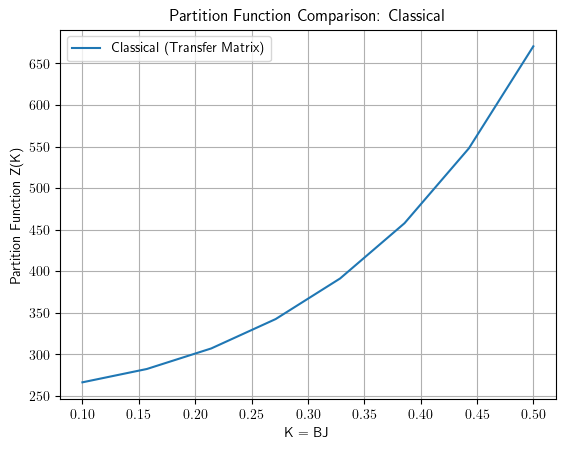

In [38]:
plt.plot(K_vals, Z_classical, label="Classical (Transfer Matrix)")
plt.xlabel("K = BJ")
plt.ylabel("Partition Function Z(K)")
plt.legend()
plt.title("Partition Function Comparison: Classical")
plt.grid(True)
plt.show()